# Importing libraries

In [2]:
import pandas as pd
import nltk
import re
import numpy as np
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import datetime

# for Bag of Words Vector
from sklearn.feature_extraction.text import CountVectorizer

# For TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# for word2Vec
from gensim.models import word2vec

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score





In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Loading dataset 

In [4]:
df = pd.read_csv("Reviews.csv")

In [5]:
#print(df.head(10))

# Find all the columns
print(df.columns)

# See  values having positive score
print(df[df["Score"] > 3])

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5            6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6            7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
...        ...         ...             ...                              ...   
568448  568449  B001EO7N10  A1F6BHEYB7R6R7                     James Braley   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH 

# EDA

In [6]:
# Removing neutral reviews
df = df[df['Score'] != 3]

In [7]:
df.duplicated().sum()

0

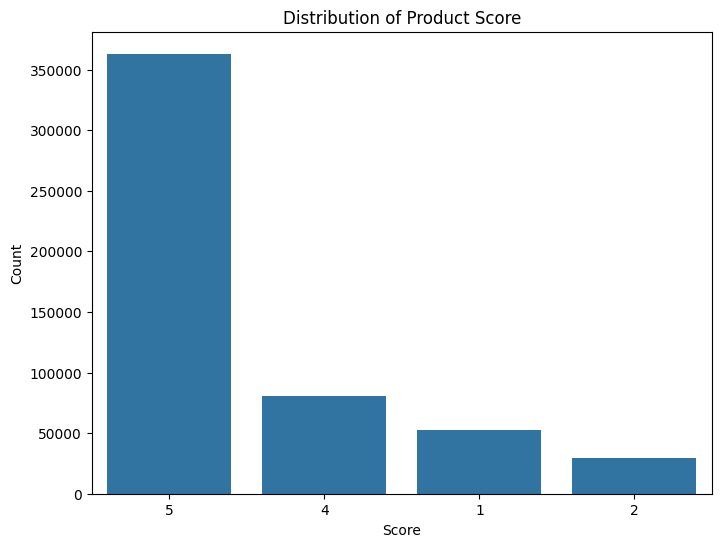

In [8]:
# Create a bar plot showing value counts of product categories
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
sns.countplot(x='Score', data = df, order = df['Score'].value_counts().index)

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Product Score')

# Show the plot
plt.show()

In [ ]:
df.isna().sum()

In [9]:
df['Score']

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 525814, dtype: int64

In [10]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
2     29769
Name: count, dtype: int64

# Converting Score values into class labels - Positive or Negative

In [11]:
def partition(x):
    if x > 3:
        return 'positive'
    return 'negative'


score_upd = df['Score']
t = score_upd.map(partition)
df['Score'] = t 

# Step 1: Sorting date for time based splitting for model  train and test dataset

In [12]:
df["Time"] = df["Time"].map(lambda t: datetime.datetime.fromtimestamp(
    int(t)).strftime('%Y-%m-%d %H:%M:%S'))

df_sorted = df.sort_values(
    'ProductId',  kind="quicksort", ascending=True)

# Step 2: Remove duplicates

In [15]:
final_df = df_sorted.drop_duplicates(subset=("UserId", "ProfileName", "Time", "Text"))

# Step 3: Helpfulness numerator should always be less than Helpfulness denominator

In [16]:
final = final_df[final_df["HelpfulnessNumerator"]
                 <= final_df["HelpfulnessDenominator"]]

final_X = final["Text"]
final_Y = final["Score"]

# Train - Test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(final_X, final_Y, test_size=0.25)

# Model Training and Evaluating

In [31]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

In [32]:

#model classifier
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [33]:
# Train the model
clf.fit(X_train, y_train)



Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [34]:
# model  Accuracy

clf.score(X_test,y_test)

0.9094933163450237

In [35]:
# using TF-IDF vectorizer

clf2 = Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('nb',MultinomialNB())
])


In [36]:
# model training
clf2.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('nb', MultinomialNB())])

In [37]:
# model  Accuracy

clf2.score(X_test,y_test)

0.8528936875981679

In [40]:
y_pred = clf.predict(X_test)

In [44]:
y_pred2 = clf2.predict(X_test)

# Model Evaluation

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [78]:
# Print results
print("(Model : CountVectorizer, MultinomialNB)")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)

(Model : CountVectorizer, MultinomialNB)
Accuracy: 0.8528936875981679
Precision: 0.8668581125034707
Recall: 0.8528936875981679
F1-Score: 0.7944230243120269
Classification Report:
              precision    recall  f1-score   support

    negative       0.95      0.06      0.12     14246
    positive       0.85      1.00      0.92     76797

    accuracy                           0.85     91043
   macro avg       0.90      0.53      0.52     91043
weighted avg       0.87      0.85      0.79     91043

Confusion Matrix:
[[  903 13343]
 [   50 76747]]


In [45]:
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')
class_report = classification_report(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)

In [80]:
print("(Model : TfidfVectorizer, MultinomialNB)")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)

(Model : TfidfVectorizer, MultinomialNB)
Accuracy: 0.8528936875981679
Precision: 0.8668581125034707
Recall: 0.8528936875981679
F1-Score: 0.7944230243120269
Classification Report:
              precision    recall  f1-score   support

    negative       0.95      0.06      0.12     14246
    positive       0.85      1.00      0.92     76797

    accuracy                           0.85     91043
   macro avg       0.90      0.53      0.52     91043
weighted avg       0.87      0.85      0.79     91043

Confusion Matrix:
[[  903 13343]
 [   50 76747]]


# For New User Inputs - Example usage

In [56]:
# Preprocessing function
def preprocess_text(text):
    snow_stemmer = nltk.stem.SnowballStemmer(language="english")
    text = text.lower()
    clean = re.compile("<.*?>")
    text = re.sub(clean, " ", text)  # Remove HTML tags
    text = re.sub(r"[?|!|\'|\"|#]", r"", text)
    text = re.sub(r"[.|,|:|(|)|\|/]", r" ", text)  # Remove punctuation

    words = [
        snow_stemmer.stem(word)
        for word in text.split()
        if word not in nltk.corpus.stopwords.words("english")
    ]  # Remove stopwords and apply stemming

    return " ".join(words)

In [73]:
def predict_sentiment(text, threshold=0.5):
    preprocessed_text = preprocess_text(text)
    print(f"Preprocessed Text: {preprocessed_text}")  # Debugging print
    
    # Predict probabilities for both classes
    probabilities = clf.predict_proba([preprocessed_text])[0]
    print(f"Predicted Probabilities: {probabilities}")  # Debugging print
    
    # Predict sentiment based on probability threshold
    if probabilities[1] >= threshold:
        sentiment = "positive"
    else:
        sentiment = "negative"
    
    print(f"Predicted Sentiment: {sentiment}")  # Debugging print
    
    return sentiment


In [74]:

# Example usage
user_input = "I absolutely love this product! It's amazing and works great"
predicted_sentiment = predict_sentiment(user_input)
print(f"Predicted Sentiment: {predicted_sentiment}")

Preprocessed Text: absolut love product amaz work great
Predicted Probabilities: [0.05901795 0.94098205]
Predicted Sentiment: positive
Predicted Sentiment: positive


In [75]:

# Example usage
user_input = "I totally hate this. Waste of money, dont go for it guys!."
predicted_sentiment = predict_sentiment(user_input)
print(f"Predicted Sentiment: {predicted_sentiment}")

Preprocessed Text: total hate wast money dont go guy
Predicted Probabilities: [0.9344472 0.0655528]
Predicted Sentiment: negative
Predicted Sentiment: negative
